Применим классический AR/MA подход для временного ряда энергопотребления

![Прогноз энергопотребления](1_21.png)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [2]:
def smape(A, F):
    return 100*np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))

* Date, Matlab format
* Hour (data averaged inbetween this hour and the next one)
* Decided Daily Production Program (MWh)	
* Projected Remaining Load Amount to Balancing Units (MWh)	
* Get load Amount for Prior Day Supply Demand Balance (MWh)	
* Load Shedding Amount for Prior Day Supply Demand Balance (MWh)	
* "System Marginal Price (SMF (TL))"

In [3]:
data = pd.read_csv("https://video.ittensive.com/time-series/ittensive.time.series.03.csv",
                   delimiter=",", header=0, names=["Дата", "Час", "DDPP", "PRLA", "GLA", "LSA", "SMF"])
data = data.reset_index().drop(labels="index", axis=1)
data.head()

,Дата,Час,DDPP,PRLA,GLA,LSA,SMF
0,734107,22,16967,19452,2486,0,119.90
1,734107,21,18502,19400,897,0,159.76
2,734107,20,18718,19345,628,0,159.31
3,734107,19,18825,19355,628,0,159.31
4,734107,18,18749,19447,697,0,159.76


Приведем дату к дате

In [4]:
data["Дата"] = pd.to_datetime((data["Дата"]-719050)*86400000000000)
data.head()

,Дата,Час,DDPP,PRLA,GLA,LSA,SMF
0,2011-03-24,22,16967,19452,2486,0,119.90
1,2011-03-24,21,18502,19400,897,0,159.76
2,2011-03-24,20,18718,19345,628,0,159.31
3,2011-03-24,19,18825,19355,628,0,159.31
4,2011-03-24,18,18749,19447,697,0,159.76


## Строим модель SARIMA

In [5]:
x = data["PRLA"]

In [6]:
aic_best = 1e10
coeff_best = (1, 1, 1)
for p in range(1,5):
    for d in range(1,5):
        for q in range(1,5):
            model_ = SARIMAX(x[-100:], order=(p, d, q), seasonal_order=(1, 1, 1, 24)).fit()
            aic = model_.aic
            print ("Тестируем", p, d, q, "результат:", aic)
            if aic < aic_best:
                coeff_best = (p, d, q)
                aic_best = aic
print ("Наилучшие коффициенты:", coeff_best)

C:\Users\Lenovo PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Lenovo PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Lenovo PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Тестируем 1 1 1 результат: 990.5188419455762
Тестируем 1 1 2 результат: 991.0997381240552


C:\Users\Lenovo PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Тестируем 1 1 3 результат: 990.869261870011


C:\Users\Lenovo PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Тестируем 1 1 4 результат: 990.7744962064127


C:\Users\Lenovo PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
C:\Users\Lenovo PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Тестируем 1 2 1 результат: 990.2190181610894
Тестируем 1 2 2 результат: 990.8793351228995


C:\Users\Lenovo PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Тестируем 1 2 3 результат: 993.9107757780766


C:\Users\Lenovo PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Тестируем 1 2 4 результат: 992.160943593152


C:\Users\Lenovo PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Тестируем 1 3 1 результат: 1019.3355689983789


C:\Users\Lenovo PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Тестируем 1 3 2 результат: 1006.4537476179743
Тестируем 1 3 3 результат: 1014.0776853149187


C:\Users\Lenovo PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Тестируем 1 3 4 результат: 1014.6676306416707


C:\Users\Lenovo PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Lenovo PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Тестируем 1 4 1 результат: 1055.397961782372


C:\Users\Lenovo PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Тестируем 1 4 2 результат: 1017.8336656612807
Тестируем 1 4 3 результат: 1033.6290762428475
Тестируем 1 4 4 результат: 1011.5729862009299
Тестируем 2 1 1 результат: 991.767327132879


C:\Users\Lenovo PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Тестируем 2 1 2 результат: 990.6505020182188


C:\Users\Lenovo PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Тестируем 2 1 3 результат: 990.710260129513


C:\Users\Lenovo PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Тестируем 2 1 4 результат: 991.3541687624464


C:\Users\Lenovo PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Тестируем 2 2 1 результат: 991.6149063144427


C:\Users\Lenovo PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Тестируем 2 2 2 результат: 994.1117636431449


C:\Users\Lenovo PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Тестируем 2 2 3 результат: 1000.1094793798244


C:\Users\Lenovo PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Тестируем 2 2 4 результат: 1003.1269290524467
Тестируем 2 3 1 результат: 1010.645081403064
Тестируем 2 3 2 результат: 1008.7868912793303


C:\Users\Lenovo PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Тестируем 2 3 3 результат: 1011.1036193331785


C:\Users\Lenovo PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Тестируем 2 3 4 результат: 1015.0976268583546
Тестируем 2 4 1 результат: 1037.4193057522043


C:\Users\Lenovo PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Тестируем 2 4 2 результат: 1015.7473474316769
Тестируем 2 4 3 результат: 1023.9698125564216


C:\Users\Lenovo PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Тестируем 2 4 4 результат: 1012.9059312342583


C:\Users\Lenovo PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Тестируем 3 1 1 результат: 992.1500413709257


C:\Users\Lenovo PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Тестируем 3 1 2 результат: 990.6979159022006


C:\Users\Lenovo PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Тестируем 3 1 3 результат: 993.9621777614566


C:\Users\Lenovo PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Тестируем 3 1 4 результат: 994.6252776703947
Тестируем 3 2 1 результат: 991.1936932982139


C:\Users\Lenovo PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Тестируем 3 2 2 результат: 995.9366220828286


C:\Users\Lenovo PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Тестируем 3 2 3 результат: 1001.4119310233486


C:\Users\Lenovo PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Тестируем 3 2 4 результат: 1002.1832955435361
Тестируем 3 3 1 результат: 1009.09690388175


C:\Users\Lenovo PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Тестируем 3 3 2 результат: 1015.0877318822497


C:\Users\Lenovo PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Тестируем 3 3 3 результат: 1020.7584021327042


C:\Users\Lenovo PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Тестируем 3 3 4 результат: 1020.8696357818801


C:\Users\Lenovo PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Тестируем 3 4 1 результат: 1022.7736735434064


C:\Users\Lenovo PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Тестируем 3 4 2 результат: 1017.8271500674713


C:\Users\Lenovo PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Тестируем 3 4 3 результат: 1014.2179238422705


C:\Users\Lenovo PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Тестируем 3 4 4 результат: 1027.8804914876528
Тестируем 4 1 1 результат: 992.7287680537362


C:\Users\Lenovo PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Тестируем 4 1 2 результат: 993.5906757611455


C:\Users\Lenovo PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Тестируем 4 1 3 результат: 997.5404376744775


C:\Users\Lenovo PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Тестируем 4 1 4 результат: 1000.1785347834826


C:\Users\Lenovo PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Тестируем 4 2 1 результат: 992.5272924570439


C:\Users\Lenovo PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Тестируем 4 2 2 результат: 994.9469128877397


C:\Users\Lenovo PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Тестируем 4 2 3 результат: 999.257282233493


C:\Users\Lenovo PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Тестируем 4 2 4 результат: 998.9303836022632


C:\Users\Lenovo PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Тестируем 4 3 1 результат: 1011.2270599995215


C:\Users\Lenovo PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Тестируем 4 3 2 результат: 1012.9609556718327


C:\Users\Lenovo PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Тестируем 4 3 3 результат: 1017.0918120453789


C:\Users\Lenovo PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Тестируем 4 3 4 результат: 1016.4833557236075


C:\Users\Lenovo PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Тестируем 4 4 1 результат: 1020.3373915614046


C:\Users\Lenovo PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Тестируем 4 4 2 результат: 1020.7381334133689


C:\Users\Lenovo PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Тестируем 4 4 3 результат: 1014.1283867796774


C:\Users\Lenovo PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Тестируем 4 4 4 результат: 1019.9111829166895
Наилучшие коффициенты: (1, 2, 1)


In [7]:
aic_best = 1e10
seasonal_coeff_best = (1, 1, 1, 24)
for P in range(1,3):
    for D in range(1,4):
        for Q in range(1,3):
            model_ = SARIMAX(x[-100:], order=coeff_best, seasonal_order=(P, D, Q, 24)).fit()
            aic = model_.aic
            print ("Тестируем", P, D, Q, "результат:", aic)
            if aic < aic_best:
                seasonal_coeff_best = (P, D, Q, 24)
                aic_best = aic
print ("Наилучшие сезонные коффициенты:", seasonal_coeff_best)

C:\Users\Lenovo PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Тестируем 1 1 1 результат: 990.2190181610894
Тестируем 1 1 2 результат: 992.9543206526728
Тестируем 1 2 1 результат: 723.1980072172605


C:\Users\Lenovo PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Тестируем 1 2 2 результат: 724.9349668965345


C:\Users\Lenovo PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Тестируем 1 3 1 результат: 412.65198104318847


C:\Users\Lenovo PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Тестируем 1 3 2 результат: 414.8265271306344


C:\Users\Lenovo PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\Users\Lenovo PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Тестируем 2 1 1 результат: 992.9686986225507


C:\Users\Lenovo PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Тестируем 2 1 2 результат: 994.204293947617


C:\Users\Lenovo PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Тестируем 2 2 1 результат: 725.4168577198067


C:\Users\Lenovo PC\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Тестируем 2 2 2 результат: 727.1997862155005
Тестируем 2 3 1 результат: 412.0671212105467
Тестируем 2 3 2 результат: 416.7199743446274
Наилучшие сезонные коффициенты: (2, 3, 1, 24)


## Визуализация результата

In [8]:
model = SARIMAX(x[:-24], order=coeff_best, seasonal_order=seasonal_coeff_best).fit()
forecast = model.get_forecast(steps=24).predicted_mean

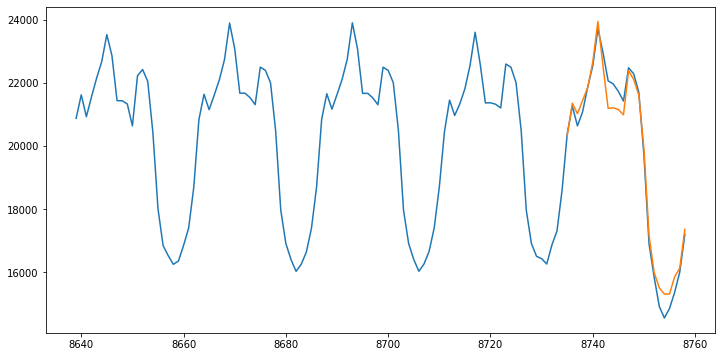

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(x[-120:])
plt.plot(forecast)
plt.show()

Оценим ошибку

In [10]:
model_smape = smape(x[-24:], forecast)
print ("Ошибка модели:", model_smape)

Ошибка модели: 41.881336503450456
